# 数据可视化之Plotnine
在前面的学习中，我们已经学习了如何使用统计知识解决相应的问题，包括：假设检验、方差分析、回归分析与分类分析等等。同时，我们也简单学习matplotlib的用法，并使用matplotlib做一些简单的描述性统计分析。现在，我们来到了统计分析的最后一个流程———表达分析结果。如何表达分析的结论是我们本节课程的核心关键，本节课程的主要内容包括：
- 什么是数据可视化
- python三大数据可视化工具库的简介：Matplotlib、Seaborn和Plotnine
- Matplotlib绘图基础
- Plotnine绘图基础
- 基本图表的Quick Start
- Plotnine和Matplotlib进阶画图
- 如何选择合适的图表正确表达数据
- 数据可视化案例：使用Plotnine绘制元素周期表

## 1.什么是数据可视化

使用文字表达结论往往显得过于单调与枯燥，所谓“一图抵千言”，适当使用图表会增加分析结论的有趣性与可读性，这里有一个关键词叫：数据可视化。

首先，我们先来探讨下“可视化”与“数据可视化”的联系与区别。可视化和数据可视化其实都旨在使用图表去表达观点，而数据可视化更加强调使用可视化的图表去表达数据中的信息，如数据分析中的结论。可视化与数据可视化的差别其实类似于：时尚杂志封面与学术杂志封面的区别，一个注重视觉的观感，另一个在注重观感的同时表达数据结论；

其次，数据可视化在一般情况下可以分为：在分析过程中的数据可视化与分析结果表达中的数据可视化。分析过程中的数据可视化强调辅助分析，即图表不是很在意观感如何，只要自己能看懂，自己从图表中得到有用的结论并辅助分析的流程其实就可以了。而分析结果表达中的数据可视化强调在阅读数据分析结论的人能更好地知道分析结论是什么，因此相对于分析过程中的数据可视化来说更加美观、表达的信息更全面；（在这里，我们主要探讨分析结果表达中的数据可视化）

最后，什么才能称得上是一个好的数据可视化图表呢？
   - 图表展示的信息全面且无歧义
   - 图表表达的信息越多、越全面越好
   - 通俗易懂，不能太专业

下面，我们用一个例子来看看什么才算是一个好的数据可视化图表：（plotnine的官方例子）

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['font.sans-serif']=['SimHei','Songti SC','STFangsong']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import seaborn as sns 

In [22]:
df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Female', 'Male', '1-24', '25-54', '55+', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40],
})
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'])
df['category'] = pd.Categorical(df['category'], categories=df['category'])

df

,variable,category,value
0,gender,Female,60
1,gender,Male,40
2,age,1-24,50
3,age,25-54,30
4,age,55+,20
5,income,Lo,10
6,income,Lo-Med,25
7,income,Med,25
8,income,High,40


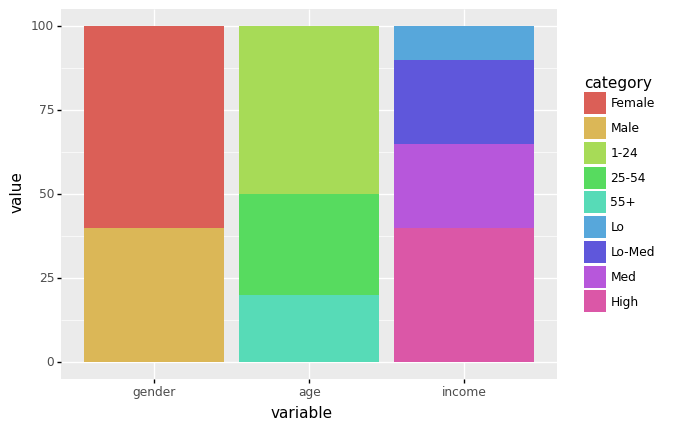

<ggplot: (320907499)>

In [23]:
# 堆叠柱状图
from plotnine import *
(
    ggplot(df, aes(x='variable', y='value', fill='category'))+
    geom_col()
)

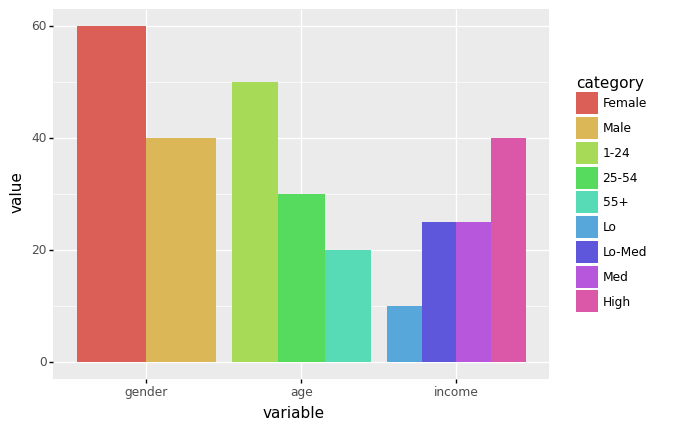

<ggplot: (320552382)>

In [24]:
# 柱状图
from plotnine import *
(
    ggplot(df, aes(x='variable', y='value', fill='category'))+
    geom_col(stat='identity', position='dodge')
)

大家现在可以先忽略可视化的代码部分，着重观察两个图表在表达信息上的差异。以上两个图其实都是表示：在gender、age和income上，不同类别的占比，但是第一个图明显比第二个图表达的信息更多，因为第一个图能表达每个类别的大致占比情况，而第二个图只能比较不同类别下的数量情况。

## 2.Python三大数据可视化工具库的简介：Matplotlib、Seaborn和Plotnine

（1）Matplotlib：

Matplotlib正如其名，脱胎于著名的建模软件Matlab，因此它的设计与Matlab非常相似，提供了一整套和Matlab相似的命令API，适合交互式制图，还可以将它作为绘图控件，嵌入其它应用程序中。同时，Matplotlib是Python数据可视化工具库的开山鼻祖。

Matplotlib是一个面向对象的绘图工具库，pyplot是Matplotlib最常用的一个绘图接口，调用方法如下：

```{python}
import matplotlib.pyplot as plt
```

在Matplotlib中，我们可以想像自己手里拿着一支画笔🖌️，每一句代码都是往纸上添加一个绘图特征，下面我们以最简单的方式绘制散点图为例：
- 创建一个图形对象，并设置图形对象的大小（可以想象成在白纸中添加一个图，并设置图的大小）：plt.figure(figsize=(6,4))
- 在纸上的坐标系中绘制散点：plt.scatter(x=x, y=y)
- 设置x轴的标签label：plt.xlabel('x')
- 设置y轴标签的label：plt.ylabel('y')
- 设置图表的标题：plt.title('y = sin(x)')
- 展示图标：plt.show()


In [25]:
# 创建数据
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)

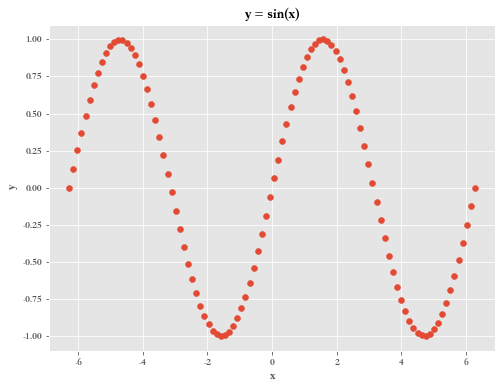

In [26]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.scatter(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(x)')
plt.show()


在上面的例子中，我们听过Matplotlib绘制了最简单的散点图，但是以上的方法没有体现Matplotlib的“面向对象”的特性。下面，我们使用一个例子体会Matplotlib的面向对象绘图的特性：

【例子】绘制y = sin(x) 和 y=cos(x)的散点图：
- 创建第一个绘图对象
     - 在纸上的坐标系中绘制散点：plt.scatter(x=x, y=sin(x))
     - 设置x轴的标签label：plt.xlabel('x')
     - 设置y轴标签的label：plt.ylabel('y')
     - 设置图表的标题：plt.title('y = sin(x)')
- 创建第二个绘图对象：
     - 在纸上的坐标系中绘制散点：plt.scatter(x=x, y=cos(x))
     - 设置x轴的标签label：plt.xlabel('x')
     - 设置y轴标签的label：plt.ylabel('y')
     - 设置图表的标题：plt.title('y = cos(x)')

In [27]:
# 准备数据
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

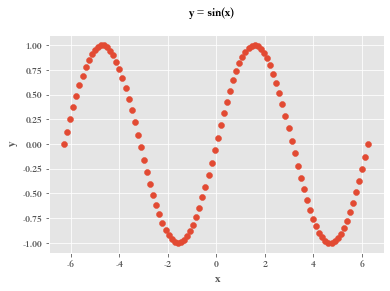

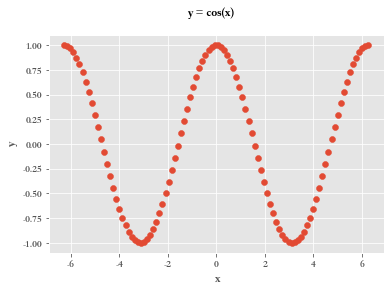

In [28]:
# 绘制第一个图：
fig1 = plt.figure(figsize=(6,4), num='first')
fig1.suptitle('y = sin(x)')
plt.scatter(x=x, y=y1)
plt.xlabel('x')
plt.ylabel('y')

# 绘制第二个图：
fig2 = plt.figure(figsize=(6,4), num='second')
fig2.suptitle('y = cos(x)')
plt.scatter(x=x, y=y2)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

现在，大家应该能体会到“Matplotlib的每一句代码都是往纸上添加一个绘图特征”这句话的含义了吧。现在，我们来看看这样的Matplotlib有什么优点与缺点。优点是非常简单易懂，而且能绘制复杂图表；缺点也是十分明显的，如果绘制复杂图表的时候一步一步地绘制，代码量还是十分巨大的。Seaborn是在Matplotlib的基础上的再次封装，是对Matplotlib绘制统计图表的简化。下面，我们一起看看Seaborn的基本绘图逻辑。

（2）Seaborn：

Seaborn主要用于统计分析绘图的，它是基于Matplotlib进行了更高级的API封装。Seaborn比matplotlib更加易用，尤其在统计图表的绘制上，因为它避免了matplotlib中多种参数的设置。Seaborn与matplotlib关系，可以把Seaborn视为matplotlib的补充。

下面，我们使用一个简单的例子，来看看使用Seaborn绘图与使用Matplotlib绘图之间的代码有什么不一样：

In [29]:
# 准备数据
x = np.linspace(-10, 10, 100)
y = 2 * x + 1 + np.random.randn(100)
df = pd.DataFrame({'x':x, 'y':y})

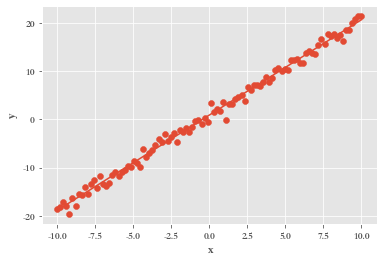

In [30]:
# 使用matplotlib绘制带有拟合直线效果的散点图
func = np.polyfit(x,y,1)  # 拟合直线
poly = np.poly1d(func)  # 设置拟合函数
y_pred = poly(x) # 预测
plt.scatter(x, y)  # 绘制点图
plt.plot(x, y_pred)  # 绘制拟合直线图
plt.xlabel('x')
plt.ylabel('y')
plt.show()

/Users/leo/miniforge3/envs/pytorch_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


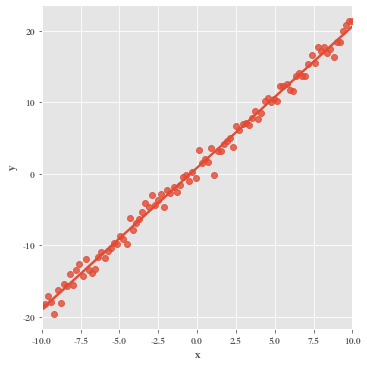

In [31]:
# 使用Seaborn绘制带有拟合直线效果的散点图
sns.lmplot("x","y",data=df) 

可以看到，Seaborn把数据拟合等**统计属性**高度集成在绘图函数中，绘图的功能还是构筑在Matplotlib之上。因此，Seaborn相当于是完善了统计图表的Matplotlib工具库，二者应该是相辅相成的。因此，在实际的可视化中，我们往往一起使用Matplotlib和Seaborn，两者的结合应该属于Python的数据可视化的一大流派吧。

（3）Plotnine：

ggplot2奠定了R语言数据可视化在R语言数据科学的统治地位，R语言的数据可视化是大一统的，提到R语言数据可视化首先想到的就是ggplot2。数据可视化一直是Python的短板，即使有Matplotlib、Seaborn等数据可视化包，也无法与R语言的ggplot2相媲美，原因在于当绘制复杂图表时，Matplotlib和Seaborn由于“每一句代码都是往纸上添加一个绘图特征”的特性而需要大量代码语句。Plotnine可以说是ggplot2在Python上的移植版，使用的基本语法与R语言ggplot2语法“一模一样”，使得Python的数据可视化能力大幅度提升，为什么ggplot2和Plotnine会更适合数据可视化呢？原因可以类似于PhotoShop绘图和PPT绘图的区别，与PPT一笔一画的绘图方式不同的是，PhotoShop绘图采用了“图层”的概念，每一句代码都是相当于往图像中添加一个图层，一个图层就是一类绘图动作，这无疑给数据可视化工作大大减负，同时更符合绘图者的认知。

下面，我们通过一个案例来看看Plotnine的图层概念以及Plotnine的基本绘图逻辑：

In [32]:
from plotnine import *     # 讲Plotnine所有模块引入
from plotnine.data import *   # 引入PLotnine自带数据集

In [33]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


mpg数据集记录了美国1999年和2008年部分汽车的制造厂商，型号，类别，驱动程序和耗油量。
- manufacturer 生产厂家
- model 型号类型
- year 生产年份
- cty 和 hwy分别记录城市和高速公路驾驶耗油量
- cyl 气缸数
- displ 表示发动机排量
- drv 表示驱动系统：前轮驱动、(f),后轮驱动®和四轮驱动(4)
- class 表示车辆类型，如双座汽车，suv，小型汽车
- fl (fuel type)，燃料类型

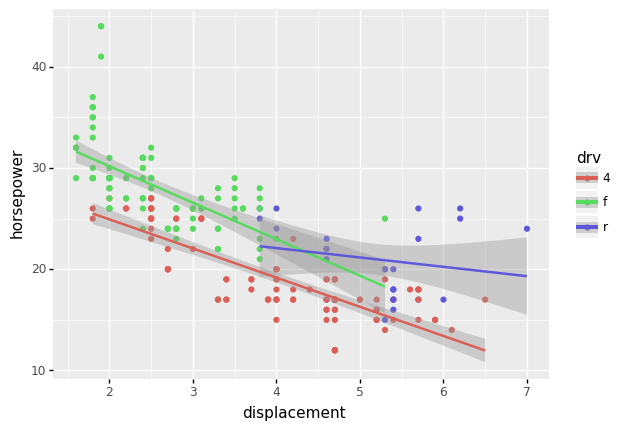

In [34]:
# 绘制汽车在不同驱动系统下，发动机排量与耗油量的关系
p1 = (
    ggplot(mpg, aes(x='displ', y='hwy', color='drv'))     # 设置数据映射图层，数据集使用mpg，x数据使用mpg['displ']，y数据使用mpg['hwy']，颜色映射使用mog['drv']
    + geom_point()       # 绘制散点图图层
    + geom_smooth(method='lm')        # 绘制平滑线图层
    + labs(x='displacement', y='horsepower')     # 绘制x、y标签图层
)
print(p1)   # 展示p1图像

从上面的案例，我们可以看到Plotnine的绘图逻辑是：一句话一个图层。因此，在Plotnine中少量的代码就能画图非常漂亮的图表，而且可以画出很多很复杂的图表，就类似于PhotoShp能轻松画出十分复杂的图但是PPT需要大量时间也不一定能达到同样的效果。

那什么时候选择Matplotlib、Seaborn还是Plotnine？

Plotnine具有ggplot2的图层特性，但是由于开发时间较晚，目前这个工具包还有一些缺陷，其中最大的缺陷就是：没有实现除了直角坐标以外的坐标体系，如：极坐标。因此，Plotnine无法绘制类似于饼图、环图等图表。为了解决这个问题，在绘制直角坐标系的图表时，我们可以使用Plotnine进行绘制，当涉及极坐标图表时，我们使用Matplotlib和Seaborn进行绘制。有趣的是，Matplotlib具有ggplot风格，可以通过设置ggplot风格绘制具有ggplot风格的图表。
```{python}
plt.style.use("ggplot")   #风格使用ggplot
```

但是值得注意的是，这里所说的绘制ggplot风格，是看起来像ggplot表格，但是实际上Matplotlib还是不具备图层风格。一旦设置ggplot风格，在接下来的所有运行的notebook代码绘图的风格都是ggplot，除非我们重启环境，才会回复默认风格。

我们使用一个案例说明这一点：


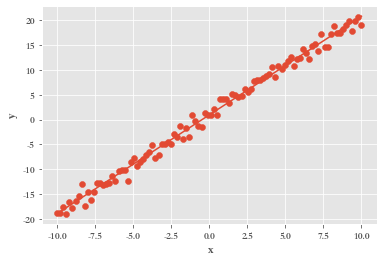

In [35]:
# 准备数据
x = np.linspace(-10, 10, 100)
y = 2 * x + 1 + np.random.randn(100)
df = pd.DataFrame({'x':x, 'y':y})

# 使用matplotlib绘制带有拟合直线效果的散点图
plt.style.use("ggplot")   #风格使用ggplot
func = np.polyfit(x,y,1)  # 拟合直线
poly = np.poly1d(func)  # 设置拟合函数
y_pred = poly(x) # 预测
plt.scatter(x, y)  # 绘制点图
plt.plot(x, y_pred)  # 绘制拟合直线图
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 3.Matplotlib绘图基础

我们知道Matplotlib的绘图特性是：一句代码相当于图上的一个笔画。因此，如果知道Matplotlib的图上包含什么元素至关重要。

Matplotlib 图表的组成元素包括: 图形 (figure)、坐标图形 (axes)、图名 (title)、图例 (legend)、 主要刻度 (major tick)、次要刻度 (minor tick)、主要刻度标签(major tick label)、次要刻度标签 (minor tick label)、 Y轴名 (Y axis label)、X轴名 ( X axis label)、边框图 (line)、数据标记 (markers)、网格 (grid) 线等。具体如图所示。

<div>
<img src="./images/1.png" width="600"/>
</div>

看着上面的图表，图表元素非常多，记也记不住，不用担心，我们对以上的绘图元素进行分类。一般来说，Mayplotlib绘图元素包括：基本绘图类型与容器绘图类型。下面，我们逐一看看：

（1）基本绘图类型（graphic primitives）：点 (marker)、线 (line)、文本 (text)、图例 (legend)、网格线 (grid)、 标题 (title)、图片 (image) 等；

（2）容器绘图类型（containers）：
- Figure：最重要的元素，代表整个图像，所有的其他元素都是绘制在其上（如果有多个子图，子图也绘制在figure上）。Figure 对象包含一些特殊的 artist 对象，如图名 (title)、图例 (legend)。
- Axes：第二重要的元素，代表 subplot（子图），数据都是显示在这个区域。一个Figure至少含有一个Axes对象，当绘制多个子图时
- Axis：代表坐标轴对象，本质是一种带装饰的 spines，一般分为 xaxis 和 yaxis，Axis对象主要用于控制数据轴上的刻度位置和显示数值。
- Spines：表示数据显示区域的边界，可以显示或不显示。
- Artist：表示任何显示在 Figure 上的元素，Artist 是很通用的概念，几乎任何需要绘制的元素都可以当成是 Artist，但是一个 Artist 只能存在于一个 Axes 之上。

如图所示：
<div>
<img src="./images/2.png" width="600"/>
</div>

一般来说，要使用Matplotlib画出一副图表，需要设置一个容器绘图类型，再在容器内添加基本绘图对象，如数据元素：点 (marker)、线 (line)、文本 (text)、图例 (legend)、网格线 (grid)、 标题 (title)、图片 (image) 等。除了数据元素以外，还需要设置**图表元素**，包括图表尺寸、坐标轴的轴名及其标签、刻度、图例、网格线等。以下图表显示了除数据元素以外的图表元素的函数：
| 函数                   | 函数功能                  | 核心参数设置举例                                                                                                                                                                                                                                    |
| :------------------- | :-------------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| figure()             | 设置图表的大小figsize与分辨率dpi | plt.figure(figsize=(6,3), dpi=75)                                                                                                                                                                                                           |
| title()              | 设置图表标题                | plt.title("这是一个标题")                                                                                                                                                                                                                         |
| xlabel()/ylabel()    | 设置x轴和y轴标签             | plt.xlabel("这是x轴标签")/plt.ylabel("这是y轴标签")                                                                                                                                                                                                   |
| axis()/xlim()/ylim() | 设置x轴和y轴的显示范围          | plt.axis(xmin=0, xmax=1, ymin=0\.5)/ plt.xlim(0,1)/plt.ylim(0,1)                                                                                                                                                                            |
| xticks()/yticks()    | 设置x轴和y轴的刻度数值          | plt.xticks(labels=['A', 'B', 'C', 'D'])/plt.yticks(list(np.arange(11))                                                                                                                                                                      |
| grid()               | 设置网格线                 | plt.grid(b=True, which='both', axis='y')  <br> \# b: 是否显示网格线 True/None;  <br> \# which: 网格线显示的尺度。字符串，可选参数，取值范围为{'major', 'minor', 'both'}，默认为'both'。'major'为主刻度、'minor'为次刻度。\# axis: 选择网格线显示的轴。字符串，可选参数，取值范围为{'both', 'x', 'y'}，默认为'both'`。 |
| legend()             | 设置图表的图例               | plt.legend("这是一个图例", loc='best') <br> \# loc表示图例的位置，可选：0-'best', 1-'upper right',2-'upper left',3-'lower left',4-'lower right',5-'right',6-'center left',7-'center right', <br> \# 8-'lower center',9-'upper center',10-'center'            |

下面，我们使用几个案例说明以上的概念：
- 创建一个figure，figure的大小figsize为(12,10);
- 在figure中创建两个Axes子图；
- 在每个Axes子图中分别绘制y=sin(x)和y=cos(x)图像，并添加title、xlabel、ylabel、axis、grid、和legend

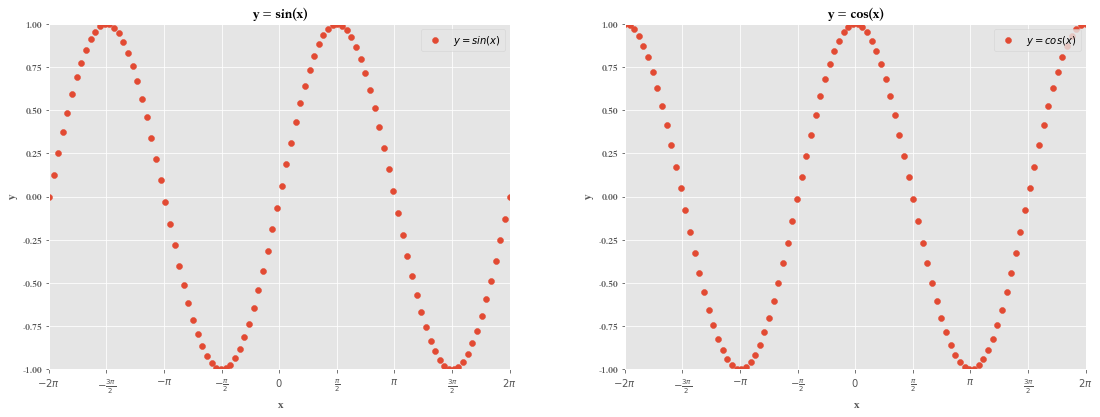

In [36]:
# 准备数据
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
# 开始绘图
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_axes([0.1,0.1,0.4,0.8])  # [left, bottom, width, height], 它表示添加到画布中的矩形区域的左下角坐标(x, y)，以及宽度和高度
plt.scatter(x=x, y=y1, label=r"$y=sin(x)$")   # 在axes1中绘制y=sin(x)散点图, label是为了legend能够知道是哪个绘图的图例
plt.title("y = sin(x)")   # 在axes1设置标题
plt.xlabel("x")    # 在axes1中设置x标签
plt.ylabel("y")    # 在axes1中设置y标签
plt.axis(xmin=-2*np.pi, xmax=2*np.pi, ymin=-1, ymax=1)  # 在axes1中设置x轴和y轴显示范围
plt.xticks(
    ticks=[-2*np.pi, -3/2*np.pi, -np.pi, -1/2*np.pi, 0, 1/2*np.pi, np.pi, 3/2*np.pi, 2*np.pi], 
    labels=[r'$-2 \pi$', r'$-\frac{3 \pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3 \pi}{2}$', r'$2\pi$']
    )   # 在axes1中设置x轴刻度的值，ticks代表在哪个位置修改，labels代表修改的具体值是多少
plt.grid(b=True, which='both')  # 在axes1中设置设置网格线
plt.legend(loc=1)   # 在axes1中设置图例

ax2 = fig.add_axes([0.6,0.1,0.4,0.8])  # [left, bottom, width, height], 它表示添加到画布中的矩形区域的左下角坐标(x, y)，以及宽度和高度
plt.scatter(x=x, y=y2, label=r"$y=cos(x)$")   # 在axes2中绘制y=cos(x)散点图，label是为了legend能够知道是哪个绘图的图例
plt.title("y = cos(x)")  # 在axes2设置标题
plt.xlabel("x")     # 在axes2中设置x轴标签
plt.ylabel("y")    # 在axes2中设置y标签
plt.axis(xmin=-2*np.pi, xmax=2*np.pi, ymin=-1, ymax=1)   # 在axes2中设置x轴和y轴显示范围
plt.xticks(
    ticks=[-2*np.pi, -3/2*np.pi, -np.pi, -1/2*np.pi, 0, 1/2*np.pi, np.pi, 3/2*np.pi, 2*np.pi], 
    labels=[r'$-2 \pi$', r'$-\frac{3 \pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3 \pi}{2}$', r'$2\pi$']
    )  # 在axes2中设置x轴刻度的值，ticks代表在哪个位置修改，labels代表修改的具体值是多少
plt.grid(b=True, which='both')   # 在axes2中设置设置网格线
plt.legend(loc=1)   # 在axes2中设置图例

plt.show()

以上的基本元素是是构成一张图所必须的，但是我们能绘制什么类型的图表至今都没有给出，直至目前为止我们也只学了散点图scatter的绘制。接下来给大家总结一下maplotlib能够绘制什么类型的图表，详细的案例会在后面给出：
<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			绘图函数
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			图表类型
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			绘图函数参数
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.plot()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			折线图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x&nbsp;
				</li>
				<li>
					y
				</li>
				<li>
					color 线条颜色
				</li>
				<li>
					linestyle线条类型
				</li>
				<li>
					linewidth 线条宽度
				</li>
				<li>
					marker 点的形状
				</li>
				<li>
					markeredgecolor 点的边框颜色
				</li>
				<li>
					markeredgewidth 点的边框的宽度
				</li>
				<li>
					markerfacecolor 点的填充颜色
				</li>
				<li>
					markersize 点的大小
				</li>
				<li>
					label 线图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.scatter()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			散点图、气泡图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					y
				</li>
				<li>
					s 散点的大小（size）
				</li>
				<li>
					c 散点的颜色（color）
				</li>
				<li>
					marker 散点的形状类型
				</li>
				<li>
					linewidths 散点的边框宽度&nbsp;
				</li>
				<li>
					edgecolors 散点的边框颜色
				</li>
				<li>
					label 点图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.bar()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			柱状图、堆叠柱状图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					height 柱子的高度
				</li>
				<li>
					width 柱子的宽度
				</li>
				<li>
					align 柱子与x的对齐方式，有：{'center'居中对齐, 'edge'左侧对齐}，默认为'center'
				</li>
				<li>
					color 柱子的填充颜色
				</li>
				<li>
					edgecolor 柱子边框的颜色
				</li>
				<li>
					linewidth 柱子边框线的宽度
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.barh()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			横向柱状图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					y
				</li>
				<li>
					height 柱子的高度
				</li>
				<li>
					width 柱子的宽度
				</li>
				<li>
					align 柱子与x的对齐方式
					<br>
				</li>
				<li>
					color 柱子的填充颜色
				</li>
				<li>
					edgecolor 柱子边框的颜色
				</li>
				<li>
					linewidth 柱子边框线的宽度
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.hist()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			直方图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					bins 划分组数
				</li>
				<li>
					range 统计的范围，默认为(x.min(), x.max())
				</li>
				<li>
					density 频数直方图还是频率直方图
				</li>
				<li>
					align&nbsp;柱子与x的对齐方式
				</li>
				<li>
					color 颜色
				</li>
				<li>
					label 直方图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.boxplot()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			箱线图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					notch 是否凹口展示
				</li>
				<li>
					sym 散点的形状
				</li>
				<li>
					vert 水平箱线图还是竖向箱线图
				</li>
				<li>
					widths 箱子的宽度
				</li>
				<li>
					label 箱线图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.fill_between()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			面积图、填充图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					y
				</li>
				<li>
					facecolor 填充颜色
				</li>
				<li>
					edgecolor 边缘线条颜色
				</li>
				<li>
					linewidth 边缘线宽度
				</li>
				<li>
					where 填充的范围
				</li>
				<li>
					interpolate&nbsp;interpolate只有在使用了where参数同时两条曲线交叉时才有效, 使用这个参数会把曲线交叉处也填充使得填充的更完整
				</li>
				<li>
					alpha 透明度
				</li>
				<li>
					label 面积图的标签（常配合legend）<wbr>
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.stackplot()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			堆叠面积图、河流图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x&nbsp;尺寸为N的一维数组&nbsp;
				</li>
				<li>
					y&nbsp;尺寸为(M,N)的二维数组&nbsp;
				</li>
				<li>
					baseline 基线，取值范围为{'zero', 'sym', 'wiggle', 'weighted_wiggle'}：'zero'：以0为基线，比如绘制简单的堆积面积图；'sym'：以0上下对称，有时被称为主题河流图；'wiggle'：所有序列的斜率平方和最小；'weighted_wiggle'： 类似于'wiggle'，但是增加各层的大小作为权重。绘制出的图形也被称为流图（streamgraph）。
				</li>
				<li>
					堆叠面积图的标签（常配合legend）
				</li>
			</ul>
			<wbr>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.pie()&nbsp;<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			饼状图<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					<font><b>x&nbsp;</b> (每一块)的比例，如果sum(x) &gt; 1会使用sum(x)归一化</font><wbr>
				</li>
				<li>
					<font>colors 填充的颜色</font>
				</li>
				<li>
					<font>labels&nbsp;</font><font>(每一块)饼图外侧显示的说明文字</font>
				</li>
				<li>
					<font>radius&nbsp;控制饼图半径</font>
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.errorbar()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			误差折线图&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					y
				</li>
				<li>
					yerr y轴的误差范围
				</li>
				<li>
					xerr x轴的误差范围
				</li>
				<li>
					fmt fmt参数的值和plot方法中指定点的颜色，形状，线条风格的缩写方式相同，如：<font>fmt='co--'</font><wbr>
				</li>
				<li>
					<font>ecolor 误差线的颜色</font>
				</li>
				<li>
					<font>elinewidth 误差线的宽度</font>
				</li>
				<li>
					<font>ms 数据点的大小</font>
				</li>
				<li>
					<font>mfc 数据点的填充颜色</font>
				</li>
				<li>
					<font>mec 数据点边缘颜色</font>
				</li>
				<li>
					<font>capthick 误差线的粗细</font>
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.axhline()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			水平直线
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					y
				</li>
				<li>
					xmin&nbsp;取值位于[0,1]之间，取值0时在图的左边界，取值1时在图的右边界
				</li>
				<li>
					xmax&nbsp;取值位于[0,1]之间，0取值时在图的左边界，取值1时在图的右边界
				</li>
				<li>
					color 线条颜色
				</li>
				<li>
					linestyle 线条类型
				</li>
				<li>
					linewidth 线条宽度
				</li>
				<li>
					label 线图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.axvline()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			竖向直线
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					ymin&nbsp;取值位于[0,1]之间，取值0时在图的左边界，取值1时在图的右边界
				</li>
				<li>
					ymax&nbsp;取值位于[0,1]之间，0取值时在图的左边界，取值1时在图的右边界
				</li>
				<li>
					color 线条颜色
				</li>
				<li>
					linestyle 线条类型
				</li>
				<li>
					linewidth 线条宽度
				</li>
				<li>
					label 线图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.axhspan()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			水平矩形带
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					ymin 矩形条带下边界的y坐标
				</li>
				<li>
					ymax 矩形条带上边界的y坐标
				</li>
				<li>
					facecolor 填充颜色
				</li>
				<li>
					alpha 透明度
				</li>
				<li>
					edgecolor 边缘线条颜色
				</li>
				<li>
					linestyle 线条类型
				</li>
				<li>
					linewidth 线条宽度
				</li>
				<li>
					label 条带标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.axvspan()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			竖直矩形带
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					xmin 矩形条带左边界的x坐标
				</li>
				<li>
					xmax 矩形条带右边界的x坐标
				</li>
				<li>
					facecolor 填充颜色
				</li>
				<li>
					alpha 透明度
				</li>
				<li>
					edgecolor 边缘线条颜色
				</li>
				<li>
					linestyle 线条类型
				</li>
				<li>
					linewidth 线条宽度
				</li>
				<li>
					label 条带标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.text()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			文本
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x 文本位置的x坐标
				</li>
				<li>
					y 文本位置的y坐标
				</li>
				<li>
					s 文本
				</li>
				<li>
					fontdict 使用字典dict形式定义文本的字体属性，如：
				</li>
			</ul>
			fontdict =&nbsp;
			<br>
			dict(
			<br>
			fontsize=12,
			<br>
			color='r',
			<br>
			family='monospace',<i>#字体,可选'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'</i>
			<br>
			weight='bold',<i>#磅值，可选'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'</i>&nbsp;
			<br>
			)<wbr>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.annotate()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			添加带箭头的文本标注
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					s 标注的文本内容
				</li>
				<li>
					xy 代表标注点的坐标位置
				</li>
				<li>
					xytext 标注的文字的坐标<wbr>
				</li>
				<li>
					arrowprops 箭头参数,参数类型为字典dict，如：<wbr>
				</li>
			</ul>
			arrowprops=dict(
			<br>
			arrowstyle = '-&gt;',&nbsp; # 箭头的风格
			<br>
			connectionstyle = 'arc3,&nbsp;# 连接方式
			<br>
			rad=0.2' # 弯曲的角度
			<br>
			)<wbr>
		</td>
	</tr>
</table>

理论上，有了绘图的基本元素以及基本图表，就可以使用Matplotlib绘制绝大多数的图表，足够满足我们的需求了。现在，我们把目光放到另一种绘图体系中，即：以ggplot2体系为基础的Plotnine绘图工具包的基本使用上，对比两个绘图工具包之间有什么区别。

## 4.Plotnine绘图基础

众所周知，Plotnine是模仿R语言ggplot2工具包而诞生的Python工具库，那什么是gg呢？ggplot2中的gg代表Grammer of Graphics，这是一个关于绘图的概念，这个概念强调使用“语法Grammer”来绘图。Plotnine绘图的基本语法跟R语言的ggplot2基本一致，Plotnine绘图使用图层的概念，其中Plotnine中的图层可以分为：必备图层和可选图层。

（1）必备图层：ggplot()图层与geom_xxx()/stat_xxx()图层：
- ggplot()图层：底层绘图函数，ggplot()函数可以将绘图和数据分离，在ggplot内可以设置数据以及数据的映射，如：ggplot(data, aes(x='col_x', y='y_value', fill='col_class'))。因此，在ggplot()中，除了设置数据外，还可以设置变量的映射aes()，用来表示x和y，还可以在aes()内控制颜色color、大小size和形状shape等等。
- geom_xxx()图层：几何对象，即我们在图中实际看到的图形元素，比如：散点图geom_point()、柱状图geom_bar()、折线图geom_line()、直方图geom_histogram()等等。同样的，我们也可以仅仅通过改变几何对象来生成不同的几何图形。通常来说，通常只使用geom_xxx()就可以绘制绝大多数的统计图表，但是如果涉及复杂的统计变换，那么则需要使用stat_xxx()图层。根据图层函数输入的变量个数和输入变量的数据类型，可以将geom_xxx()图层的函数总结如下：
  
<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			变量个数
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			变量类型
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_xxx()函数
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			函数作用
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			1
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			连续型
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_histogram ()
			<br>
			geom_density()
			<br>
			geom_dotplot()
			<br>
			geom_freqpoly()
			<br>
			geom_qq()
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			直方图
			<br>
			密度图
			<br>
			点图
			<br>
			频次图
			<br>
			qq图<wbr>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			1
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			离散型
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_bar()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			柱状图
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			x连续型-y连续型
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_point()
			<br>
			geom_area()
			<br>
			geom_line()
			<br>
			geom_jitter()
			<br>
			geom_smooth()
			<br>
			geom_label()
			<br>
			geom_text()
			<br>
			geom_bin2d()
			<br>
			geom_density2d()
			<br>
			geom_step()
			<br>
			geom_quantile()
			<br>
			geom_rug()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			散点图
			<br>
			面积图
			<br>
			线图
			<br>
			抖动散点图
			<br>
			平滑图
			<br>
			带背景的文本注释图
			<br>
			文字注释
			<br>
			阶梯图
			<br>
			分位数回归图
			<br>
			突出xy位置的散点图<wbr>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			x离散-y连续
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_boxplot()
			<br>
			geom_violin()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			箱线图
			<br>
			提琴图<wbr>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			x离散-y离散
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_count()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			统计直方图
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			3
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			x连续-y连续-z连续
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_tile()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			热力图
		</td>
	</tr>
</table>



- stat_xxx()图层：统计变换图层，比如求均值，求方差等，当我们需要展示出某个变量的某种统计特征的时候，则需要用到统计变换。

下面，我们使用一个例子说明如何使用Plotnine必备图层作图：


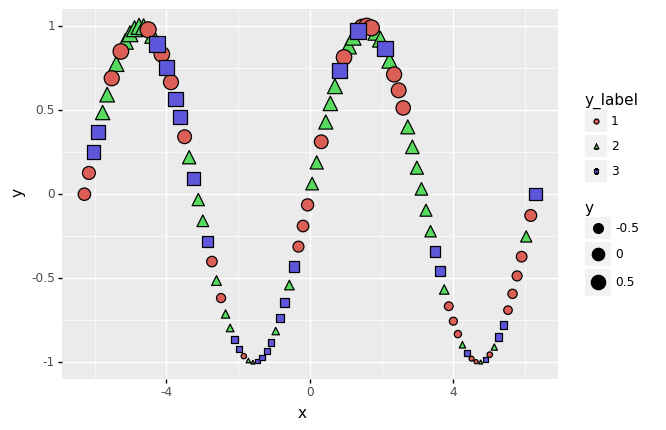

In [37]:
# 准备数据
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)
y_label = np.random.choice(['1','2','3'], 100)
data = pd.DataFrame({'x':x, 'y':y, 'label':y_label})

# 绘制散点图geom_point()
p1 = (
    ggplot(data, aes(x='x', y='y', fill='y_label', size='y', shape='y_label'))+
    geom_point()
)
print(p1)


（2）可选图层：必备图层其实已经囊括了绝大对数绘图函数，基本图形已经可以绘制。但是，光只有绘图函数还是不够的，还需要美化图表的相关图层以及变换坐标系相关图层，包括：scale_xxx()、facet_xxx()、guides_xxx()、coord_xxx()以及theme()。
- scale_xxx()图层：标度（scale）是用于调整数据映射的图形属性，scale_xxx()获取数据并对其进行调整以适应视觉的不同方面，即长度、颜色、大小和形状等。一般来说，scale_xxx()的基本格式为：scale_映射类型_数据类型（）。其中，映射类型包括：xy轴，size, color(颜色), fill(填充颜色), shape, alpha(透明度), linetype；数据类型包括：连续型continuous，离散型discrete，自定义manual，同一型identity。
<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>连续型continuous</b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>离散型discrete</b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>自定义manual</b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>同一型identity</b>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			坐标轴标度scale_x_xxx()/scale_y_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_x_continous()
			<br>
			scale_y_continous()
			<br>
			scale_x_log10()
			<br>
			scale_y_log10()
			<br>
			scale_x_sqrt()
			<br>
			scale_y_sqrt()
			<br>
			scale_x_reverse()
			<br>
			scale_y_reverse()
			<br>
			scale_x_date()
			<br>
			scale_y_date()
			<br>
			scale_x_datetime()
			<br>
			scale_y_datetime()
			<br>
			scale_x_timedelta()
			<br>
			scale_y_timedelta()
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_x_discrete()
			<br>
			scale_y_discrete()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			颜色标度sclae_color_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_color_continous()
			<br>
			scale_color_distiller()
			<br>
			scale_color_gradient()
			<br>
			scale_color_gradient2()
			<br>
			scale_color_gradientn()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_color_discrete()
			<br>
			scale_color_brewer()
			<br>
			scale_color_hue()
			<br>
			<font color="#333333">scale_color_grey()<wbr></font><font color="#333333">scale_color_gray()</font><wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<font color="#333333">scale_color_manual()</font>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<font color="#333333">scale_color_identity()</font>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			填充标度scale_fill_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_fill_continuous()
			<br>
			scale_fill_distiller()
			<br>
			scale_fill_gradient()
			<br>
			scale_fill_gradient2()
			<br>
			scale_fill_gradientn()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_fill_discrete()
			<br>
			scale_fill_brewer()
			<br>
			scale_fill_hue()
			<br>
			scale_fill_gray()
			<br>
			scale_fill_grey()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_fill_manual()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_fill_identity()
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			大小标度scale_size_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_size()
			<br>
			scale_size_area()
			<br>
			scale_size_radius()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_size_manual()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_size_identity()
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			透明度标度scale_alpha_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_alpha()
			<br>
			scale_alpha_continuous()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_alpha_discrete()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_alpha_manual()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_alpha_identity
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			线条样式标度scale_linetype_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_linetype()
			<br>
			scale_linetype_discrete()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_linetype_manual()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_linetype_identity()
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			形状标度scale_shape_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_shape()
			<br>
			scale_shape_discrete()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_shape_manua()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_shape_identity(
		</td>
	</tr>
	<tr>
		<td colspan="5" style="padding-right: 3pt; padding-left: 3pt;">
			参数列表&nbsp; &nbsp; &nbsp; &nbsp;lims()&nbsp; &nbsp;&nbsp;xlim()&nbsp; &nbsp;&nbsp;ylim()&nbsp; &nbsp; &nbsp;&nbsp;expand_limits()&nbsp; &nbsp; &nbsp;guides()&nbsp; &nbsp; &nbsp;&nbsp;guide()&nbsp; &nbsp; &nbsp;guide_legend()&nbsp; &nbsp; &nbsp; &nbsp;guide_colorbar()
		</td>
	</tr>
</table>

举个例子：

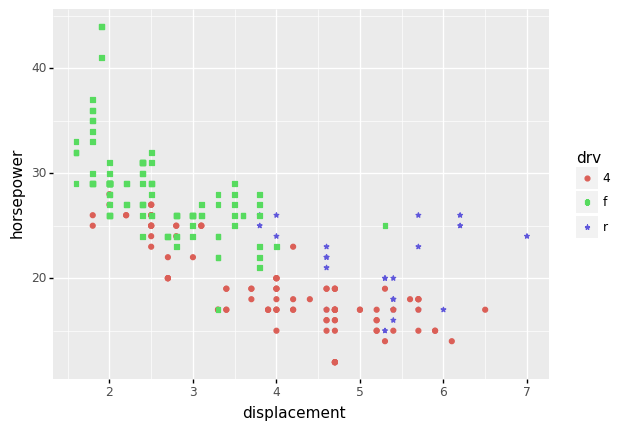

In [38]:
p1 = (
    ggplot(mpg, aes(x='displ', y='hwy', color='drv', shape='drv'))     # 设置数据映射图层，数据集使用mpg，x数据使用mpg['displ']，y数据使用mpg['hwy']，颜色映射使用mog['drv']
    + geom_point()       # 绘制散点图图层
    + labs(x='displacement', y='horsepower')     # 绘制x、y标签图层
    + scale_shape_manual(values=('o', 's', '*'))  # 添加shape映射美化
)
print(p1)   # 展示p1图像

- coord_xxx()图层：坐标系图层，一般来说，平面中的坐标系有笛卡尔直角坐标系和极坐标系，plotnine目前只支持直角坐标系，因此这是plotnine最大的弊端。在plotnine中，coord_xxx()图层的函数有：
   - coord_cartesian()
   - coord_equal()
   - coord_fixed()
   - coord_flip()
   - coord_trans()

- facet_xxx()图层：分面图层，主要是将一个图按照某个变量分解成多个图，主要是对比在同一变量的不同取值下，关系图表的变化。分面图层的函数有：
     - facet()
     - facet_grid()
     - facet_null()
     - facet_wrap()

   举个例子：

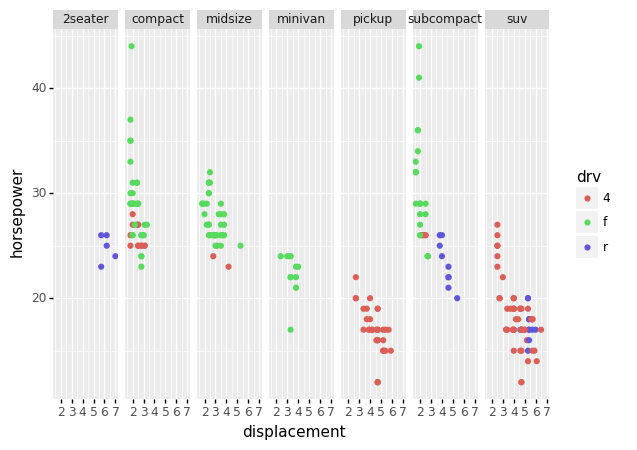

In [39]:
# 绘制汽车在不同的车辆类型下，在不同的驱动系统，发动机排量与耗油量的关系
p1 = (
    ggplot(mpg, aes(x='displ', y='hwy', color='drv'))     # 设置数据映射图层，数据集使用mpg，x数据使用mpg['displ']，y数据使用mpg['hwy']，颜色映射使用mog['drv']
    + geom_point()       # 绘制散点图图层
    + labs(x='displacement', y='horsepower')     # 绘制x、y标签图层
    + facet_grid('.~ class', labeller='label_value') # 按照车辆类型分面
)
print(p1)   # 展示p1图像

- theme():主题调整，主要是设定主题风格。主要有以下主题：
     - theme()
     - theme_538()
     - theme_bw()
     - theme_classic()
     - theme_dark()
     - theme_gray()
     - theme_grey()
     - theme_light()
     - theme_linedraw()
     - theme_matplotlib()
     - theme_minimal()
     - theme_seaborn()
     - theme_void()
     - theme_xkcd()

## 5.基本图表的Quick Start

首先，在画图之前，我们先要知道数据可视化的图像能分成几类？根据数据表现的内容，我们将数据可视化的图表分为以下类别：
- 类别型图表
- 关系型图表
- 数据分布型图表
- 时间序列型图表
- 空间分布型图表

（1）类别型图表：

类别型图表一般表现为：X类别下Y数值之间的比较，因此类别型图表往往包括：**X为类别型数据、Y为数值型数据**。类别型图表常常有：柱状图、横向柱状图（条形图）、堆叠柱状图、极坐标的柱状图、词云、雷达图、桑基图等等。

（2）关系型图表：

关系型图表一般表现为：X数值与Y数值之间的关系，如：是否是线性关系、是否有正向相关关系等等。一般来说，关系可以分为：数值型关系、层次型关系和网络型关系。
- 数值型关系：主要展示两个变量或者多个变量之间的数值关系，如：最简单的散点图、气泡图、相关系数矩阵图、等高线图、曲面图等等。
- 层次型关系：主要展示数据个体（样本）之间的层次关系，有从属关系和包含关系两种。从属关系顾名思义如：不同职位之间的上下属关系，如最简单的树状图；包含关系如：欧洲不同的足球联赛的队伍包含关系，不同洲的国家包含关系等等，如：韦恩图、弧长链接图、圆填充图、旭日图等等。
- 网络型关系：常常值个体之间有联系，但并不是相互包含或者从属关系，如：微信中的朋友的关系网络。网络型关系的图表一般有：和弦图、桑基图、网络图等等。

（3）数据分布型图表：

分布这个词在概率论和数理统计中出现，分布常常指数据以及出现的频率，常见的图表有：频次直方图、频率直方图、核密度图、箱线图、提琴图等等。

（4）时间序列型图表：

时间序列型图表主要描述了数据沿着之间变化而变化的规律，一般来说横轴是时间，纵轴是数值或者类别型数据。常见的图表有折线图、日历图、甘特图等等。

（5）空间分布型图表：

空间分布顾名思义，主要描述了某个数值型/类别型数据随着空间位置变化的规律，如：地图散点图、地图气泡图、地图热力图等等。

下面，我们来详细学习每一种图表的绘制过程：

### 5.1 类别型图表：

（1）柱状图:

柱状图一般分为单系列柱状图、多系列柱状图、堆叠柱状图和百分比柱状图：

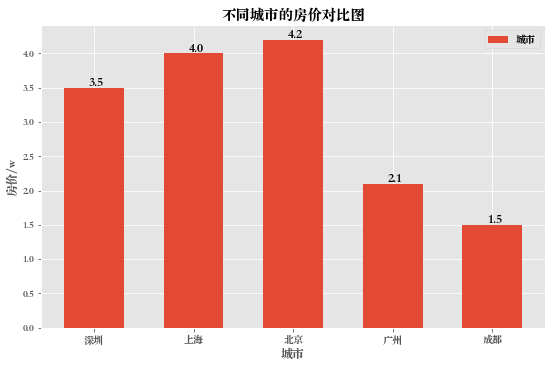

In [71]:
## Matplotlib绘制单系列柱状图：不同城市的房价对比
data = pd.DataFrame({'city':['深圳', '上海', '北京', '广州', '成都'], 'house_price(w)':[3.5, 4.0, 4.2, 2.1, 1.5]})

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0.15,0.15,0.7,0.7])  # [left, bottom, width, height], 它表示添加到画布中的矩形区域的左下角坐标(x, y)，以及宽度和高度
plt.bar(data['city'], data['house_price(w)'], width=0.6, align='center', orientation='vertical', label='城市')
"""
x 表示x坐标，数据类型为int或float类型，也可以为str
height 表示柱状图的高度，也就是y坐标值，数据类型为int或float类型
width 表示柱状图的宽度，取值在0~1之间，默认为0.8
bottom 柱状图的起始位置，也就是y轴的起始坐标
align 柱状图的中心位置，"center","lege"边缘
color 柱状图颜色
edgecolor 边框颜色
linewidth 边框宽度
tick_label 下标标签
log 柱状图y周使用科学计算方法，bool类型
orientation 柱状图是竖直还是水平，竖直："vertical"，水平条："horizontal"
"""
plt.title("不同城市的房价对比图")   # 在axes1设置标题
plt.xlabel("城市")    # 在axes1中设置x标签
plt.ylabel("房价/w")    # 在axes1中设置y标签
plt.grid(b=True, which='both')  # 在axes1中设置设置网格线
for i in range(len(data)):
    plt.text(i-0.05, data.iloc[i,]['house_price(w)']+0.01, data.iloc[i,]['house_price(w)'],fontsize=13)   # 添加数据注释
plt.legend()
plt.show()


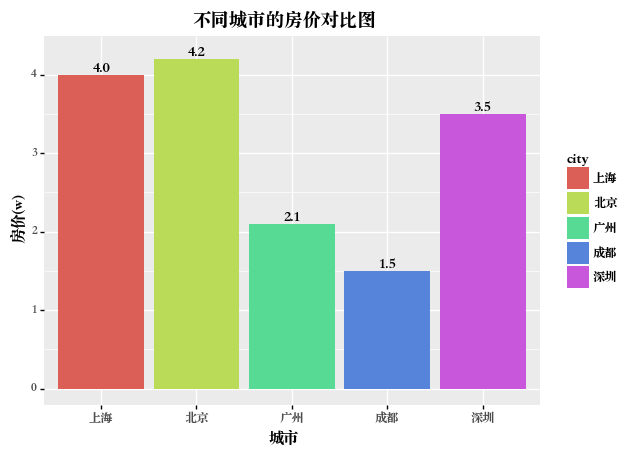

In [94]:
## Plotnine绘制单系列柱状图：不同城市的房价对比
data = pd.DataFrame({'city':['深圳', '上海', '北京', '广州', '成都'], 'house_price(w)':[3.5, 4.0, 4.2, 2.1, 1.5]})

p_single_bar = (
    ggplot(data, aes(x='city', y='house_price(w)', fill='city', label='house_price(w)'))+
    geom_bar(stat='identity')+
    labs(x="城市", y="房价(w)", title="不同城市的房价对比图")+
    geom_text(nudge_y=0.08)+
    theme(text = element_text(family = "Songti SC"))
)
print(p_single_bar)


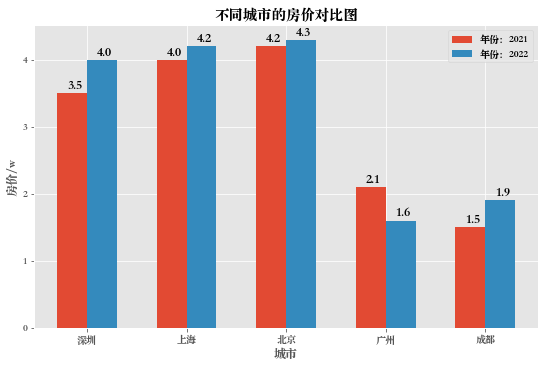

In [115]:
## Matplotlib绘制多系列柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0.15,0.15,0.7,0.7])  # [left, bottom, width, height], 它表示添加到画布中的矩形区域的左下角坐标(x, y)，以及宽度和高度
plt.bar(
    np.arange(len(np.unique(data['城市'])))-0.15, 
    data.loc[data['年份']==2021,'房价(w)'], 
    width=0.3, 
    align='center', 
    orientation='vertical', 
    label='年份：2021'
    )
plt.bar(
    np.arange(len(np.unique(data['城市'])))+0.15, 
    data.loc[data['年份']==2022,'房价(w)'], 
    width=0.3, 
    align='center', 
    orientation='vertical', 
    label='年份：2022'
    )
plt.title("不同城市的房价对比图")   # 在axes1设置标题
plt.xlabel("城市")    # 在axes1中设置x标签
plt.ylabel("房价/w")    # 在axes1中设置y标签
plt.xticks(np.arange(len(np.unique(data['城市']))), np.array(['深圳', '上海', '北京', '广州', '成都']))
plt.grid(b=True, which='both')  # 在axes1中设置设置网格线

data_2021 = data.loc[data['年份']==2021,:]
for i in range(len(data_2021)):
    plt.text(i-0.15-0.05, data_2021.iloc[i,2]+0.05, data_2021.iloc[i,2],fontsize=13)   # 添加数据注释

data_2022 = data.loc[data['年份']==2022,:]
for i in range(len(data_2022)):
    plt.text(i+0.15-0.05, data_2022.iloc[i,2]+0.05, data_2022.iloc[i,2],fontsize=13)   # 添加数据注释
plt.legend()
plt.show()

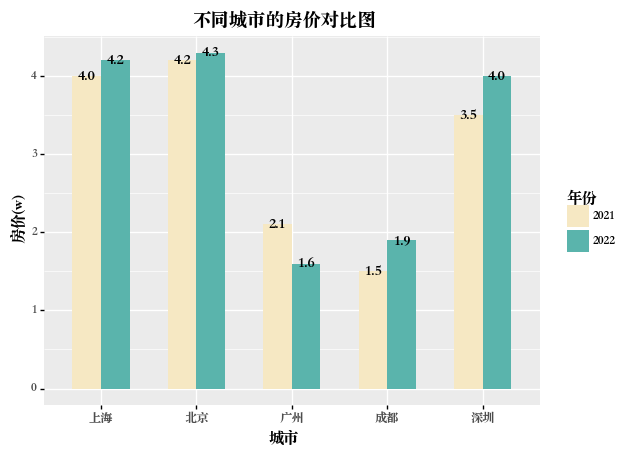

In [153]:
## Plotnine绘制多系列柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})

data['年份'] = pd.Categorical(data['年份'], ordered=True, categories=data['年份'].unique())
p_mult_bar = (
    ggplot(data, aes(x='城市', y='房价(w)', fill='年份'))+
    geom_bar(stat='identity',width=0.6, position='dodge')+
    scale_fill_manual(values = ["#f6e8c3", "#5ab4ac"])+
    labs(x="城市", y="房价(w)", title="不同城市的房价对比图")+
    geom_text(aes(label='房价(w)'), position = position_dodge2(width = 0.6, preserve = 'single'))+
    theme(text = element_text(family = "Songti SC"))
)
print(p_mult_bar)

   城市  2021房价  2022房价
0  上海     4.0     4.2
1  北京     4.2     4.3
2  广州     2.1     1.6
3  成都     1.5     1.9
4  深圳     3.5     4.0


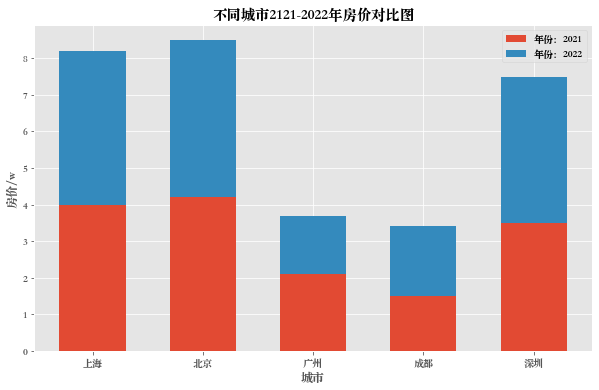

In [173]:
## Matplotlib绘制堆叠柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})
tmp=data.set_index(['城市','年份'])['房价(w)'].unstack()
data=tmp.rename_axis(columns=None).reset_index()
data.columns = ['城市','2021房价','2022房价']
print(data)

plt.figure(figsize=(10,6))
plt.bar(
    data['城市'], 
    data['2021房价'], 
    width=0.6, 
    align='center', 
    orientation='vertical', 
    label='年份：2021'
    )
plt.bar(
    data['城市'], 
    data['2022房价'], 
    width=0.6, 
    align='center', 
    orientation='vertical', 
    bottom=data['2021房价'],
    label='年份：2022'
    )
plt.title("不同城市2121-2022年房价对比图")   # 在axes1设置标题
plt.xlabel("城市")    # 在axes1中设置x标签
plt.ylabel("房价/w")    # 在axes1中设置y标签
plt.legend()
plt.show()


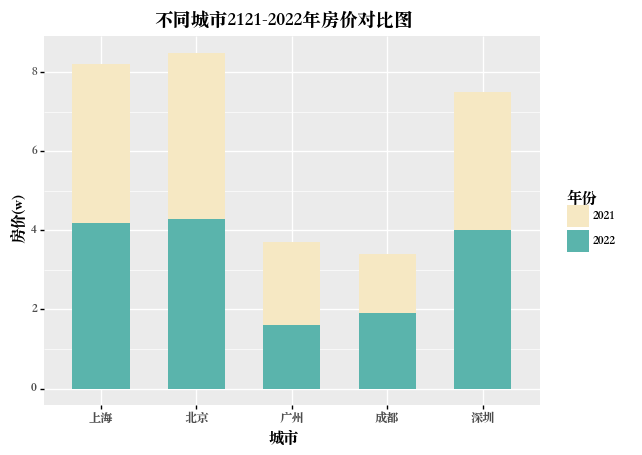

In [177]:
## Plotnine绘制堆叠柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})

data['年份'] = pd.Categorical(data['年份'], ordered=True, categories=data['年份'].unique())
p_mult_bar = (
    ggplot(data, aes(x='城市', y='房价(w)', fill='年份'))+
    geom_bar(stat='identity',width=0.6, position='stack')+   # 只需要改变position='stack'
    scale_fill_manual(values = ["#f6e8c3", "#5ab4ac"])+
    labs(x="城市", y="房价(w)", title="不同城市2121-2022年房价对比图")+
    theme(text = element_text(family = "Songti SC"))
)
print(p_mult_bar)

   城市  2021房价  2022房价
0  上海     4.0     4.2
1  北京     4.2     4.3
2  广州     2.1     1.6
3  成都     1.5     1.9
4  深圳     3.5     4.0


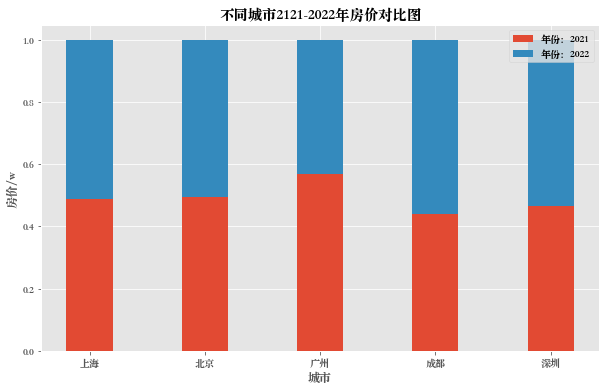

In [182]:
## Matplotlib绘制百分比柱状图：不同城市在不同年份的房价对比
## Matplotlib绘制堆叠柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})
tmp=data.set_index(['城市','年份'])['房价(w)'].unstack()
data=tmp.rename_axis(columns=None).reset_index()
data.columns = ['城市','2021房价','2022房价']
print(data)

plt.figure(figsize=(10,6))
plt.bar(
    data['城市'], 
    data['2021房价']/(data['2021房价']+data['2022房价']), 
    width=0.4, 
    align='center', 
    orientation='vertical', 
    label='年份：2021'
    )
plt.bar(
    data['城市'], 
    data['2022房价']/(data['2021房价']+data['2022房价']), 
    width=0.4, 
    align='center', 
    orientation='vertical', 
    bottom=data['2021房价']/(data['2021房价']+data['2022房价']),
    label='年份：2022'
    )
plt.title("不同城市2121-2022年房价对比图")   # 设置标题
plt.xlabel("城市")    # 在axes1中设置x标签
plt.ylabel("房价/w")    # 在axes1中设置y标签
plt.legend()
plt.show()

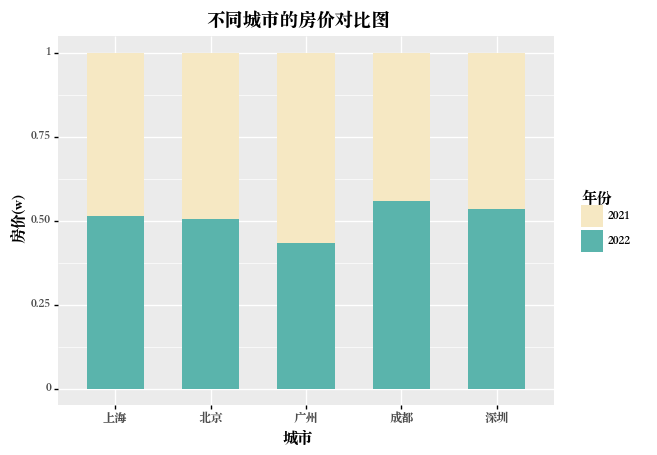

In [178]:
## Plotnine绘制百分比柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})

data['年份'] = pd.Categorical(data['年份'], ordered=True, categories=data['年份'].unique())
p_mult_bar = (
    ggplot(data, aes(x='城市', y='房价(w)', fill='年份'))+   
    geom_bar(stat='identity',width=0.6, position='fill')+     # 只需要改变position='fill'
    scale_fill_manual(values = ["#f6e8c3", "#5ab4ac"])+
    labs(x="城市", y="房价(w)", title="不同城市的房价对比图")+
    theme(text = element_text(family = "Songti SC"))
)
print(p_mult_bar)